In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/documents/kaggle'

In [4]:
! kaggle datasets download -d shivkumarganesh/bumble-dating-app-google-play-store-review

Dataset URL: https://www.kaggle.com/datasets/shivkumarganesh/bumble-dating-app-google-play-store-review
License(s): Attribution 4.0 International (CC BY 4.0)
 83% 15.0M/18.2M [00:01<00:00, 18.1MB/s]
100% 18.2M/18.2M [00:01<00:00, 12.3MB/s]


In [5]:
! unzip -qq bumble-dating-app-google-play-store-review.zip

In [7]:
! pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.4-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.4-py3-none-any.whl (240 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246488 sha256=f52739e15d086d18f2d3c718b1cbe484c5fc91980f9d4445d14a1a85291fc4d3
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [8]:
import numpy as np
import pandas as pd
import fasttext
import fasttext.util

In [9]:
fasttext.util.download_model('en')

'cc.en.300.bin'

In [10]:
ft = fasttext.load_model('cc.en.300.bin')

In [11]:
ft.get_word_vector('language').shape

(300,)

In [12]:
ft.get_nearest_neighbors('dog')

[(0.8463464975357056, 'dogs'),
 (0.7873005270957947, 'puppy'),
 (0.7692237496376038, 'pup'),
 (0.7435278296470642, 'canine'),
 (0.733370840549469, 'pet'),
 (0.7326501607894897, 'doggie'),
 (0.7242385745048523, 'dog--'),
 (0.7231176495552063, 'beagle'),
 (0.7229929566383362, 'dachshund'),
 (0.7078613042831421, 'cat')]

In [13]:
ft.get_nearest_neighbors('king')

[(0.7550359964370728, 'kings'),
 (0.7068519592285156, 'queen'),
 (0.7060439586639404, 'king-'),
 (0.6811205148696899, 'king.'),
 (0.660710871219635, 'king.The'),
 (0.6591265797615051, 'King'),
 (0.6495252251625061, 'prince'),
 (0.6278106570243835, '-king'),
 (0.6183920502662659, 'monarch'),
 (0.6070184707641602, 'queen-mother')]

In [15]:
data = pd.read_csv('bumble_google_play_reviews.csv')
data = data[data.content.notna()]
data.shape

(155851, 11)

In [16]:
from torchtext.data.utils import get_tokenizer

/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [17]:
tokenizer = get_tokenizer("basic_english", language="en")

In [18]:
X = data.content.apply(tokenizer).to_list()

In [19]:
X[:3]

[['tu',
  'da',
  '5',
  'like',
  'e',
  'acabou',
  'os',
  'like',
  'gratuito',
  'por',
  '24',
  'horas',
  ',',
  'vtnc',
  'tá',
  'pior',
  'que',
  'tinder',
  'essa',
  'prr',
  ',',
  'vai',
  'ser',
  'mercenário',
  'assim',
  'na',
  'casa',
  'do',
  'crl'],
 ['yo', 'i'],
 ['try',
  'to',
  'purchase',
  'premium',
  '.',
  'and',
  'say',
  'awaiting',
  'approval',
  'so',
  'doesn',
  "'",
  't',
  'let',
  'me',
  'see',
  'likes']]

In [21]:
data.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7cdb37f4-8a8a-45ed-b01a-ca5cf7f30c5e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,tu da 5 like e acabou os like gratuito por 24 ...,1,0,5.381.0,2024-08-18 00:27:57,NaN,NaN,5.381.0
1,0933c801-3493-4644-98b6-66aeb6410985,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,yo i,5,0,5.381.0,2024-08-17 23:58:27,Thanks for your feedback. We’re so happy to he...,2024-08-18 04:07:09,5.381.0
2,fda73b31-c99e-44c6-a5ef-cfc112bf5ce4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,try to purchase premium. and say awaiting appr...,1,0,5.381.0,2024-08-17 23:36:41,We're sorry to hear about this. Please message...,2024-08-18 01:46:09,5.381.0
3,a323602d-481a-4a23-93f6-d40986c70402,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,it's ok,3,0,5.381.0,2024-08-17 23:16:16,Thanks for sharing this feedback with us—we lo...,2024-08-18 01:45:41,5.381.0
4,03daced6-8f27-47c3-8c13-8c9dc6b08c39,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice 🙂,5,0,5.380.0,2024-08-17 23:08:33,Thank you for your feedback! We're happy to he...,2024-08-18 01:45:39,5.380.0


In [20]:
y = (data.score >= 4).to_numpy().astype(int)

In [22]:
y

array([0, 1, 0, ..., 1, 1, 1])

In [23]:
import seaborn as sns
sns.set(style='darkgrid')

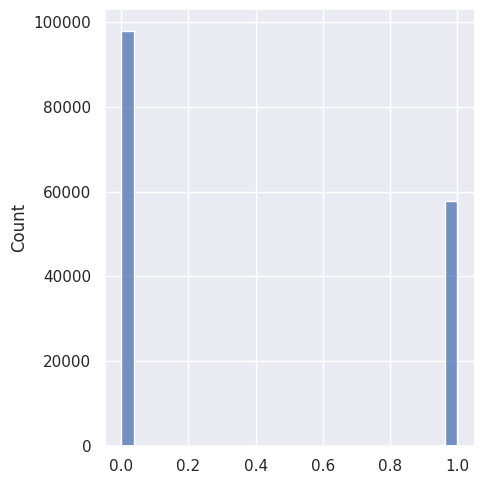

In [24]:
_ = sns.displot(y)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
len(X_train), len(X_valid)

(116888, 38963)

In [28]:
X_train_sents = [' '.join(sent) for sent in X_train]
X_valid_sents = [' '.join(sent) for sent in X_valid]

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tf_idf = TfidfVectorizer(min_df=5).fit(X_train_sents)

In [31]:
tf_idf_train = tf_idf.transform(X_train_sents)
tf_idf_valid = tf_idf.transform(X_valid_sents)

In [32]:
tf_idf_train.shape, tf_idf_valid.shape

((116888, 8899), (38963, 8899))

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression(max_iter=1000).fit(tf_idf_train, y_train)

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [39]:
print(f"Train accuracy with TfidfVectorizer: {accuracy_score(y_train, log_reg.predict(tf_idf_train))}")
print(f"Validation accuracy with TfidfVectorizer: {accuracy_score(y_valid, log_reg.predict(tf_idf_valid))}")

Train accuracy with TfidfVectorizer: 0.9022910820614606
Validation accuracy with TfidfVectorizer: 0.8895105613017478


In [40]:
def get_sentence_ft_embed(sent):
    embeds = []
    for word in sent:
        embeds += [ft.get_word_vector(word)]

    return np.stack(embeds, axis=0).mean(0)

In [60]:
len(X_train_sents)

116888

In [62]:
from tqdm.notebook import tqdm

In [63]:
train_embeds = np.array([get_sentence_ft_embed(sent) for sent in tqdm(X_train_sents)])
valid_embeds = np.array([get_sentence_ft_embed(sent) for sent in tqdm(X_valid_sents)])

  0%|          | 0/116888 [00:00<?, ?it/s]

  0%|          | 0/38963 [00:00<?, ?it/s]

In [64]:
train_embeds.shape

(116888, 300)

In [65]:
log_reg_ft = LogisticRegression(max_iter=1000).fit(train_embeds, y_train)

In [66]:
print(f"Train accuracy with FastText Vectorizer: {accuracy_score(y_train, log_reg_ft.predict(train_embeds))}")
print(f"Validation accuracy with FastText Vectorizer: {accuracy_score(y_valid, log_reg_ft.predict(valid_embeds))}")

Train accuracy with FastText Vectorizer: 0.7299637259598932
Validation accuracy with FastText Vectorizer: 0.728896645535508


In [57]:
from torch.utils.data import Dataset, DataLoader

In [67]:
BATCH_SIZE = 128
MAX_SEQUENCE_LENGTH = 256
MODEL_BLOCKS = 2
MODEL_CHANNELS = 300
NUM_EPOCHS = 5

In [119]:
class EmbeddingsDataset(Dataset):
    def __init__(self, sents, targets, max_length):
        super().__init__()

        self.max_length = max_length
        self.sents = sents
        self.targets = targets

    def __len__(self):
        return len(self.sents)

    def __getitem__(self, item):
        sent = self.sents[item]

        length = min(len(sent), self.max_length)

        embeds = []

        for word in sent[:length]:
            embeds += [torch.from_numpy(ft.get_word_vector(word).astype(np.float32))]

        embeds = torch.stack(embeds, dim=1)

        padding = torch.zeros((embeds.shape[0], self.max_length - length))

        embeds = torch.cat([embeds, padding], dim=1)

        return embeds, length, self.targets[item]

In [120]:
train_set = EmbeddingsDataset(X_train, y_train, max_length=MAX_SEQUENCE_LENGTH)
valid_set = EmbeddingsDataset(X_valid, y_valid, max_length=MAX_SEQUENCE_LENGTH)

In [121]:
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True)
valid_loader = DataLoader(valid_set, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

In [122]:
import torch.nn as nn

In [123]:
class BasicBlock(nn.Module):
    def __init__(self, num_channels, kernel_size):
        super().__init__()
        self.num_channels = num_channels
        self.kernel_size = kernel_size

        padding = (self.kernel_size - 1) // 2

        self.conv1 = nn.Conv1d(
            in_channels=self.num_channels,
            out_channels=self.num_channels,
            kernel_size=self.kernel_size,
            padding=padding,
            bias=False
        )

        self.bn1 = nn.BatchNorm1d(self.num_channels)

        self.conv2 = nn.Conv1d(
            in_channels=self.num_channels,
            out_channels=self.num_channels,
            kernel_size=self.kernel_size,
            padding=padding,
            bias=False
        )

        self.bn2 = nn.BatchNorm1d(self.num_channels)

        self.relu = nn.LeakyReLU(0.1)

    def forward(self, X):
        out = self.relu(self.bn1(self.conv1(X)))
        out = self.relu(self.bn2(self.conv2(out)) + X)
        return out


In [150]:
class TextCNN(nn.Module):
    def __init__(self, num_blocks, num_channels, num_classes, kernel_size=5):
        super().__init__()

        self.backbone = nn.Sequential(
            *[BasicBlock(num_channels, kernel_size) for _ in range(num_blocks)]
        )

        self.classifier = nn.Linear(num_channels, num_classes)

    @staticmethod
    def get_lengths_mask(embeds, lengths):
        mask = torch.arange(embeds.shape[-1]).unsqueeze(0).to(embeds.device)
        mask = (mask < lengths.unsqueeze(1)).to(torch.float)

        return mask.unsqueeze(1)

    def forward(self, embeds, lengths):
        # embeds (B, C, T), lenghts (B, )
        features = self.backbone(embeds)
        # features (B, C, T)
        mask = self.get_lengths_mask(embeds, lengths)
        # mask (B, 1, T)
        features = (features * mask).sum(-1) / lengths.unsqueeze(1)
        # features (B, C)
        logits = self.classifier(features)
        # logits (B, num_classes)
        return logits

In [151]:
def train_epoch(model, train_loader, optimizer, loss_fn, device):
    train_loss = 0
    train_accuracy = 0

    model.train()
    for embeds, lengths, labels in tqdm(train_loader):
        embeds = embeds[..., :lengths.max()]
        embeds, lengths, labels = embeds.to(device), lengths.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(embeds, lengths)
        loss = loss_fn(output, labels)
        train_loss += loss.item()
        train_accuracy += (torch.argmax(output, dim=1) == labels).sum().item()
        loss.backward()
        optimizer.step()

    return train_loss / len(train_loader.dataset), train_accuracy / len(train_loader.dataset)

In [152]:
import torch

In [153]:
@torch.inference_mode()
def evaluate_epoch(model, valid_loader, loss_fn, device):
    valid_loss = 0
    valid_accuracy = 0

    model.eval()
    for embeds, lengths, labels in tqdm(valid_loader):
        embeds, lengths, labels = embeds.to(device), lengths.to(device), labels.to(device)

        output = model(embeds, lengths)
        loss = loss_fn(output, labels)
        valid_loss += loss.item()
        valid_accuracy += (torch.argmax(output, dim=1) == labels).sum().item()

    return valid_loss / len(valid_loader.dataset), valid_accuracy / len(valid_loader.dataset)

In [154]:
from IPython.display import clear_output

In [155]:
def plot_stats(
        train_loss_history,
        valid_loss_history,
        train_accuracy_history,
        valid_accuracy_history,
        title
):
    clear_output()

    plt.figure(figsize=(13, 6))

    plt.plot(train_loss_history, label='train loss')
    plt.plot(valid_loss_history, label='valid loss')

    plt.title(title + ' loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.legend()
    plt.show()

    plt.figure(figsize=(13, 6))

    plt.plot(train_accuracy_history, label='train acc')
    plt.plot(valid_accuracy_history, label='valid acc')

    plt.title(titel + ' accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

    plt.legend()
    plt.show()

In [156]:
def fit(model, train_loader, valid_loader, optimizer, loss_fn, num_epochs, device, title, scheduler=None):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(num_epochs):
        train_loss, train_acuracy = train_epoch(model, train_loader, optimizer, loss_fn, device)
        valid_loss, valid_accuracy = evaluate_epoch(model, valid_loader, loss_fn, device)

        train_loss_history.append(train_loss)
        valid_loss_history.apend(valid_loss)
        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        plot_stats(train_loss_history, valid_loss_history, train_accuracy_history, valid_accuracy_history, title)

        if scheduler is not None:
            scheduler.step()

In [157]:
model = TextCNN(num_blocks=MODEL_BLOCKS, num_channels=MODEL_CHANNELS, num_classes=2, kernel_size=5)

In [158]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [159]:
num_epochs = NUM_EPOCHS

In [160]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

In [161]:
loss_fn = nn.CrossEntropyLoss()

In [162]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
fit(model, train_loader, valid_loader, optimizer, loss_fn, num_epochs, device,  'Text CNN model', scheduler)

  0%|          | 0/914 [00:00<?, ?it/s]